<a href="https://colab.research.google.com/github/Polyakri/projects/blob/main/MachineLearningProjects/RockPaperScissors_Game/1_DataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Necessary Libraries


In [ ]:
import os
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Preparing the dataset

Read the images from the folder they are in, greyscale them, label them and make them numpy arrays

In [ ]:
root_folder = "drive/MyDrive/MLFinalEx/Dataset"

def process_images(root_folder, label, target_size=(300, 200)):
    folder_path = os.path.join(root_folder, label)

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Display a progress bar
    x_data = []
    y_data = []
    for i, image_file in enumerate(tqdm(image_files, desc=label.capitalize())):
        image_path = os.path.join(folder_path, image_file)

        # Read the image
        img = Image.open(image_path)

        # Resize the image to the target size
        img = img.resize(target_size)

        # Convert to grayscale
        img = img.convert('L')

        # Convert image to numpy array
        img_array = np.array(img)

        # Append to data lists
        x_data.append(img_array)
        y_data.append(label)

    return x_data, y_data

# Check if the CSV file already exists

labels = ['rock', 'paper', 'scissors']
x_data, y_data = [], []

for label in labels:
    x_label, y_label = process_images(root_folder, label)
    x_data.extend(x_label)
    y_data.extend(y_label)

# Convert to numpy arrays
x_data = np.array(x_data)
y_data = np.array(y_data)



Scissors: 100%|██████████| 750/750 [00:05<00:00, 144.21it/s]


In [ ]:
indices_to_flip = list(range(363)) + list(range(727, 1084)) + list(range(1813, 2188))

# Iterate through the selected indices and flip the images with label 0 horizontally
for idx in indices_to_flip:
  x_data[idx] = cv2.flip(x_data[idx], 1)

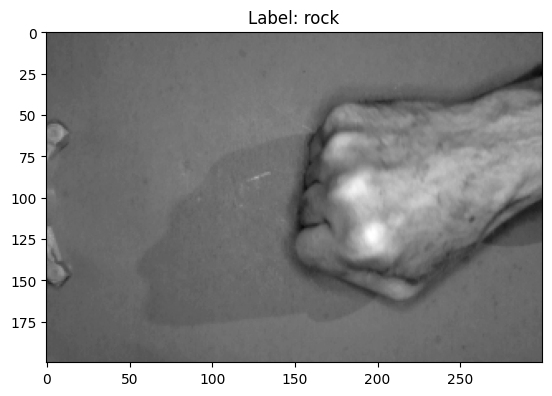

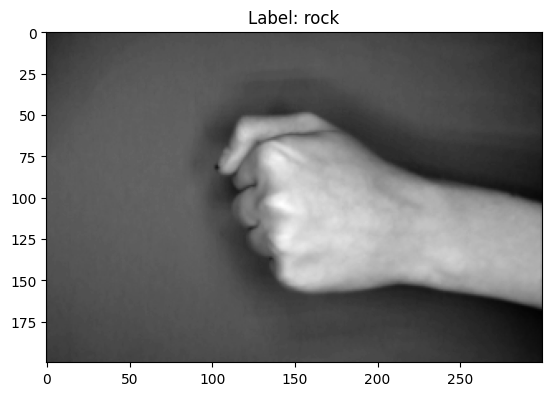

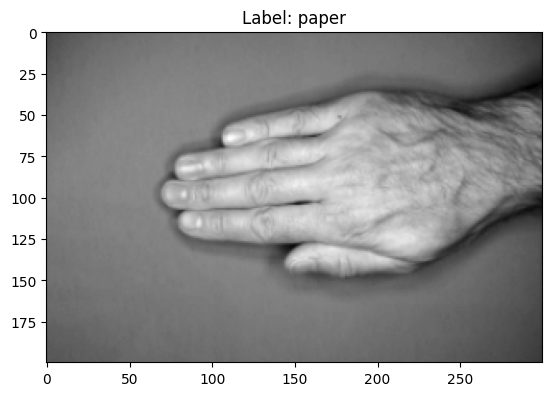

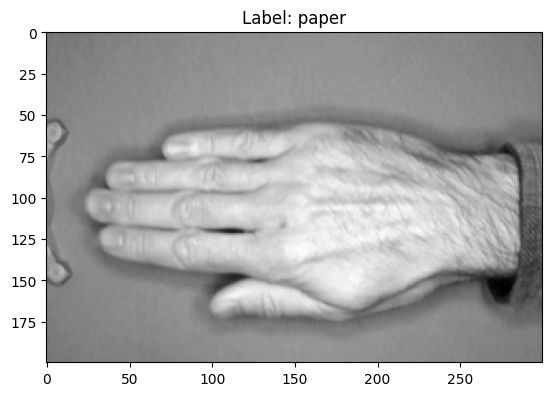

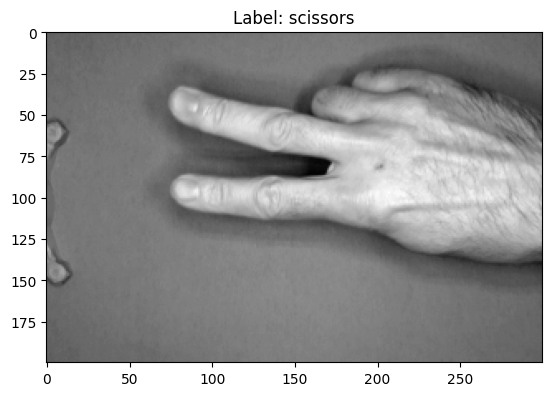

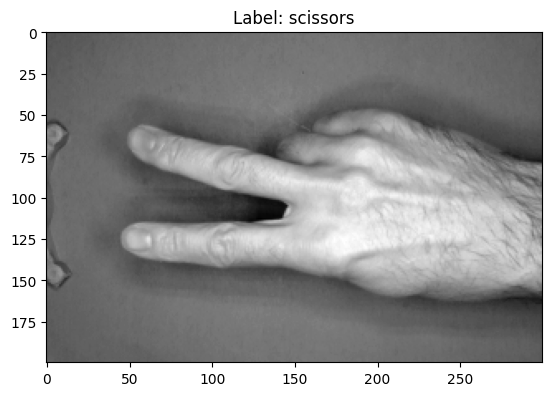

In [ ]:
for label in labels:
    label_indices = np.where(y_data == label)[0]
    random_indices = np.random.choice(label_indices, size=2, replace=False)

    for index in random_indices:
        image = x_data[index]
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label}")
        plt.show()

Normalize the data

In [ ]:
x_data = x_data/255

Make the labels as numbers

In [ ]:
label_mapping = {'rock': 0, 'paper': 1, 'scissors': 2}

# Applying the mapping to y_data
y_data = np.array([label_mapping[label] for label in y_data])



Reshape the data

In [ ]:
print("Shape x_data before reshape:", x_data.shape)

# Reshape the array
x_data = x_data.reshape(x_data.shape[0], -1)

# Print the shape after reshape
print("Shape x_data after reshape:", x_data.shape)
print("Shape y_data:", y_data.shape)

Shape x_data before reshape: (2188, 200, 300)
Shape x_data after reshape: (2188, 200, 300)
Shape y_data: (2188,)


Save the data so I do not need to read and process them each time

Note this is the original dataset

In [ ]:
directory_path = 'drive/MyDrive/MLFinalEx/NoPCA'

np.save(os.path.join(directory_path, 'x_data_original.npy'), x_data)

# Save x_test_transformed
np.save(os.path.join(directory_path, 'y_data_original.npy'), y_data)

I created a second dataset with horizontally/vertically flipped images

In [ ]:
def horizontal_flip_images(images):
    flipped_images = [cv2.flip(img, 1) for img in images]
    return np.array(flipped_images)

# Double the dataset by horizontally flipping images
flipped_x = horizontal_flip_images(x_data)
x_data = np.concatenate([x_data, flipped_x], axis=0)

# Assuming labels y remain the same after flipping
y_data = np.concatenate([y_data, y_data], axis=0)



In [ ]:
def vertical_flip_images(images):
    flipped_images = [cv2.flip(img, 0) for img in images]
    return np.array(flipped_images)

# Double the dataset by vertically flipping images
flipped_x = vertical_flip_images(x_data)
x_data = np.concatenate([x_data, flipped_x], axis=0)

# Assuming labels y remain the same after flipping
y_data = np.concatenate([y_data, y_data], axis=0)

In [ ]:
print("Shape x_data before reshape:", x_data.shape)

# Reshape the array
x_data = x_data.reshape(x_data.shape[0], -1)

# Print the shape after reshape
print("Shape x_data after reshape:", x_data.shape)
print("Shape y_data:", y_data.shape)

Shape x_data before reshape: (4376, 200, 300)
Shape x_data after reshape: (4376, 60000)
Shape y_data: (4376,)


Save the data so I won't have to preproccess again

In [ ]:
directory_path = 'drive/MyDrive/MLFinalEx/NoPCA'

np.save(os.path.join(directory_path, 'x_data_full_flipped.npy'), x_data)

# Save x_test_transformed
np.save(os.path.join(directory_path, 'y_data_full_flipped.npy'), y_data)